<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Load the dataset into a dataframe.


In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [12]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


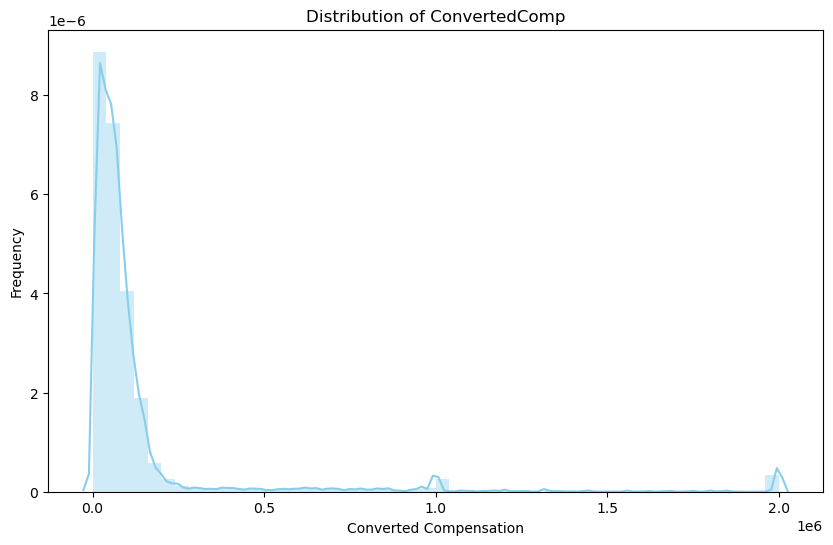

In [8]:
# your code goes here
df_new = df.dropna(subset=['ConvertedComp'])

plt.figure(figsize=(10, 6))
sns.distplot(df_new['ConvertedComp'], kde=True, color='skyblue')
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

Plot the histogram for the column `ConvertedComp`.


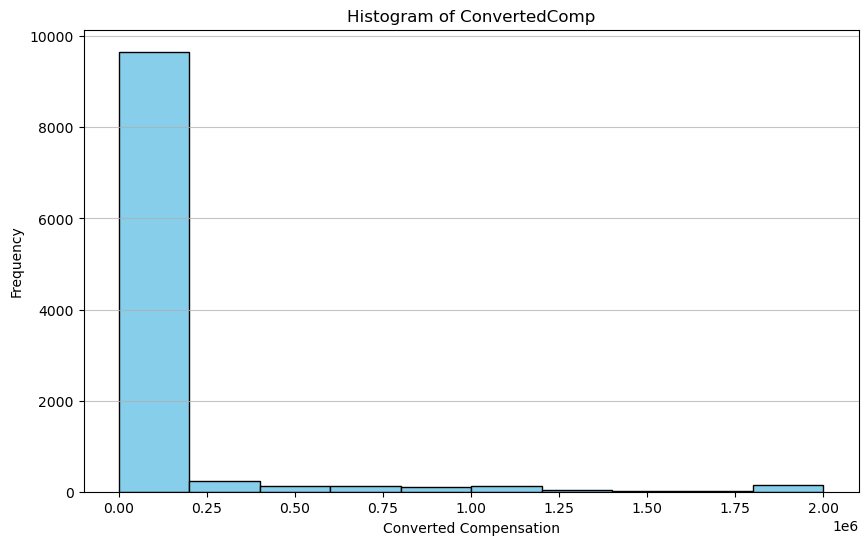

In [9]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df_new['ConvertedComp'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

What is the median of the column `ConvertedComp`?


In [18]:
# your code goes here
median_convertedComp = df['ConvertedComp'].median()

print("Median of 'ConvertedComp':", median_convertedComp)

Median of 'ConvertedComp': 57745.0


How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
df_new['Gender'].value_counts()

Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
# your code goes here
median_convertedcomp_women = df[df['Gender'] == 'Woman']['ConvertedComp'].median()

print("Median ConvertedComp of responders identified as Woman:", median_convertedcomp_women)

Median ConvertedComp of responders identified as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
summary_age = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])

# In ra five-number summary
print("Five-number summary for the column 'Age':")
print("Minimum:", summary_age['min'])
print("Q1 (25th percentile):", summary_age['25%'])
print("Median (50th percentile):", summary_age['50%'])
print("Q3 (75th percentile):", summary_age['75%'])
print("Maximum:", summary_age['max'])

Five-number summary for the column 'Age':
Minimum: 16.0
Q1 (25th percentile): 25.0
Median (50th percentile): 29.0
Q3 (75th percentile): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


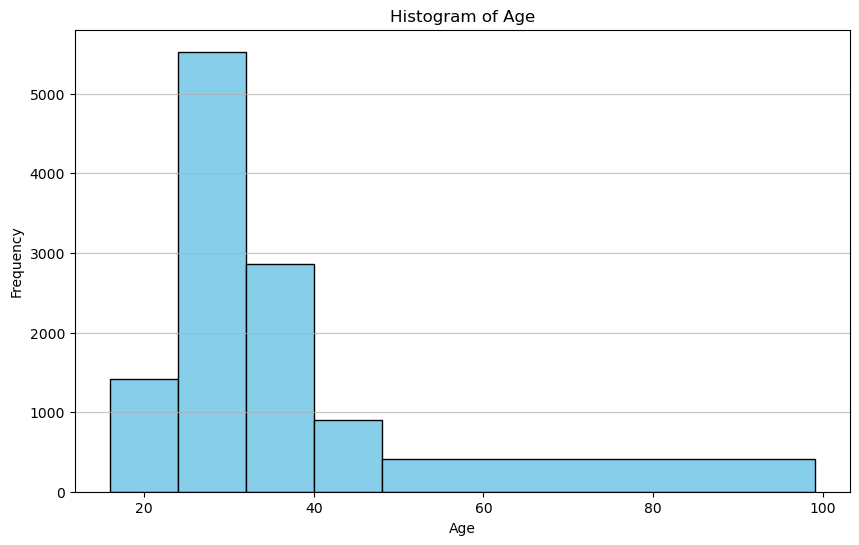

In [21]:
# your code goes here
bins = [16, 24, 32, 40, 48, 99]

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


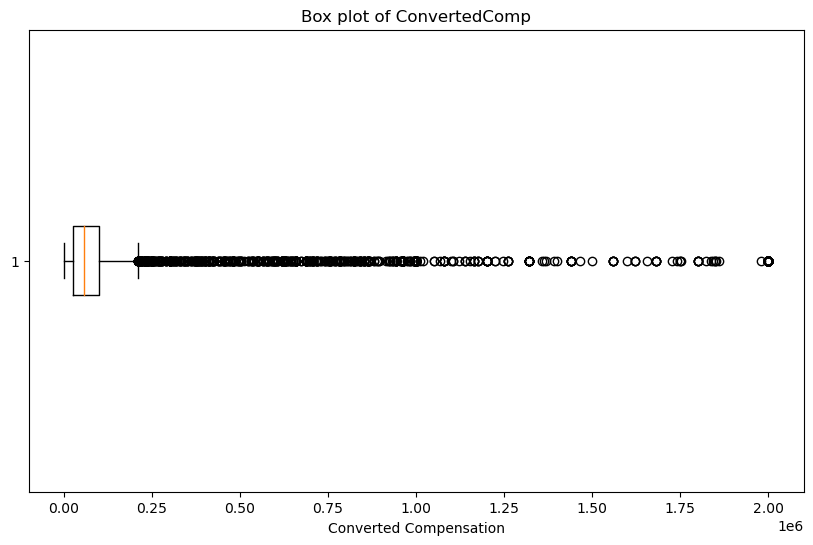

In [23]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.boxplot(df_new['ConvertedComp'], vert=False)
plt.title('Box plot of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [25]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print("Inter Quartile Range (IQR) for ConvertedComp:", IQR)

Inter Quartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [26]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: -82830.0
Upper bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [27]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = len(outliers)

print("Number of outliers in ConvertedComp column:", num_outliers)

Number of outliers in ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [28]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Original DataFrame shape: (11398, 85)
DataFrame shape after removing outliers: (9703, 85)


In [29]:
nooutliers_median_convertedComp = df_no_outliers['ConvertedComp'].median()

print("Median of 'ConvertedComp':", nooutliers_median_convertedComp)

Median of 'ConvertedComp': 52704.0


In [31]:
nooutliers_mean_convertedComp = df_no_outliers['ConvertedComp'].mean()

print("Mean of 'ConvertedComp':", nooutliers_mean_convertedComp)

Mean of 'ConvertedComp': 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [43]:
numerical_cols = df.select_dtypes(include='number').columns

print("Các cột có kiểu dữ liệu numerical:")
print(numerical_cols)

Các cột có kiểu dữ liệu numerical:
Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs',
       'Age'],
      dtype='object')


In [46]:
# your code goes here
from scipy import stats

df_new2 = df.replace([float('inf')], pd.NA).dropna()

pearson_coef, p_value = stats.pearsonr(df_new2['Age'], df_new2['Respondent'])
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)


Pearson correlation coefficient: 0.027927932126156466
p-value: 0.3757485184514851


In [48]:
pearson_coef, p_value = stats.pearsonr(df_new2['Age'], df_new2['CompTotal'])
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.012502596719719103
p-value: 0.6917597284070235


In [49]:
pearson_coef, p_value = stats.pearsonr(df_new2['Age'], df_new2['ConvertedComp'])
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.10965497290570049
p-value: 0.00048730437389257124


In [50]:
pearson_coef, p_value = stats.pearsonr(df_new2['Age'], df_new2['WorkWeekHrs'])
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.04069028615444102
p-value: 0.19677019674137072


In [51]:
pearson_coef, p_value = stats.pearsonr(df_new2['Age'], df_new2['CodeRevHrs'])
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: -0.007431105314911956
p-value: 0.8137114159183613


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
